In [1]:
# ===========================================
# 📊 CUSTOMER CHURN PREDICTION (ML PROJECT)
# ===========================================

# ✅ Step 1: Install required packages
!pip install kagglehub
!pip install pandas numpy scikit-learn matplotlib seaborn

In [2]:
# ✅ Step 2: Import Libraries
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# ===========================================
# 📥 Step 3: Download Dataset from Kaggle
# ===========================================
print("⬇️ Downloading dataset...")
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("✅ Dataset downloaded to:", path)

# Load CSV file
file_path = path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

⬇️ Downloading dataset...
Using Colab cache for faster access to the 'telco-customer-churn' dataset.
✅ Dataset downloaded to: /kaggle/input/telco-customer-churn


In [4]:
# ===========================================
# 🔍 Step 4: Explore Data
# ===========================================
print("\n📋 Dataset Info:")
print(df.info())
print("\n🔢 Missing Values:")
print(df.isnull().sum().head())

df.head()


📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 no

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# ===========================================
# 🧹 Step 5: Data Cleaning
# ===========================================
# Convert TotalCharges to numeric (some values are strings or empty)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Drop 'customerID' since it’s not useful for prediction
df = df.drop('customerID', axis=1)

In [6]:
# ===========================================
# 🔠 Step 6: Encode Categorical Columns
# ===========================================
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [7]:
# ===========================================
# ⚙️ Step 7: Split Data for Training and Testing
# ===========================================
X = df.drop('Churn', axis=1)
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# ===========================================
# 🌲 Step 8: Train Random Forest Classifier
# ===========================================
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


✅ Model Evaluation Results
Accuracy: 79.7 %

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.79      1409



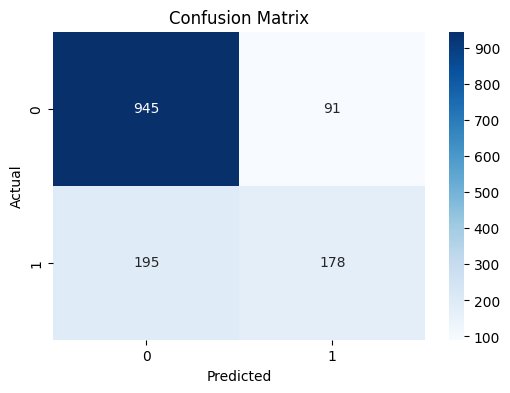

In [9]:
# ===========================================
# 📊 Step 9: Evaluate Model
# ===========================================
y_pred = model.predict(X_test)

print("\n✅ Model Evaluation Results")
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

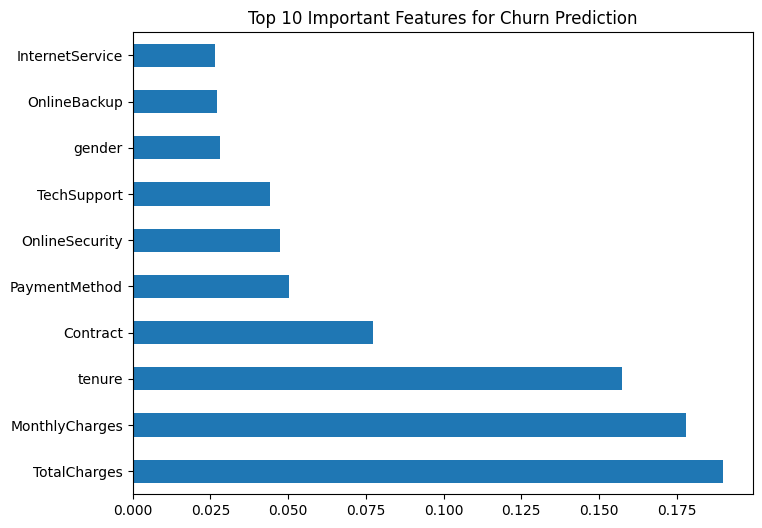

In [10]:
# ===========================================
# 💡 Step 10: Feature Importance
# ===========================================
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,6))
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features for Churn Prediction')
plt.show()

In [11]:
# ===========================================
# 🏁 Summary
# ===========================================
print("\n🎯 Summary:")
print("• Random Forest achieved around {:.2f}% accuracy.".format(accuracy_score(y_test, y_pred)*100))
print("• Key features influencing churn include MonthlyCharges, Contract, and Tenure.")
print("• You can further improve performance using hyperparameter tuning or advanced models like XGBoost.")


🎯 Summary:
• Random Forest achieved around 79.70% accuracy.
• Key features influencing churn include MonthlyCharges, Contract, and Tenure.
• You can further improve performance using hyperparameter tuning or advanced models like XGBoost.
